# Primer ejercicio

### Importe de librerías

In [114]:
import numpy as np
from math import floor
from scipy.special import erfc
import matplotlib.pyplot as plt

# Inciso i

i. Proponga las matrices generadora y de control de paridad. Determine cuántos errores puede
corregir y detectar sin cometer errores. Calcule la ganancia de codificación asintótica

### Matriz generadora y de control de paridad

El código es un (14,10), por lo tanto:
- n=14 (longitud total de la palabra de codigo)
- k=10 (longitud del mensaje original)
- n-k=4 (bits de paridad)

Usamos la forma sistemática:

- G = [I|P] donde
- I = matriz identidad (10x10)
- P = matriz de paridad (10x4)

Aplicando la cota de hamming, llegamos a que tc = 1 (15 <= 16), por lo tanto dmin = 2*tc + 1 = 2*1+1 = 3
- Elegimos una matriz P que sea válida para un código de Hamming extendido (14,10) con dmin = 3

In [89]:
n = 14
k = 10
dmin = 3

I = np.eye(k, dtype=int)
print ("Matriz identidad I[k*k]")
print(" ")
print (I)


Matriz identidad I[k*k]
 
[[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]


A continuación se arma la matriz de paridad, cumpliendo que:
-  las filas sea distintas y no nulas
- wH > Dmin - 1 --> wH> 0 (cada fila debe tener por lo menos 1 uno)
- filas linealmente independientes

In [92]:
P = np.array([
    [1,0,1,1],
    [0,1,1,1],
    [1,1,0,1],
    [1,1,1,0],
    [0,0,1,0],
    [1,0,0,1],
    [0,1,0,1],
    [1,1,1,1],
    [0,1,1,0],
    [1,0,1,0]
], dtype=int)

print("Matriz de paridad P [ k * (n-k) ]")
print(" ")
print(P)


Matriz de paridad P [ k * (n-k) ]
 
[[1 0 1 1]
 [0 1 1 1]
 [1 1 0 1]
 [1 1 1 0]
 [0 0 1 0]
 [1 0 0 1]
 [0 1 0 1]
 [1 1 1 1]
 [0 1 1 0]
 [1 0 1 0]]


In [94]:
G = np.hstack((I, P))
print("Matriz G --> G[k*n] = [ I k*k | P k*(n-k) ]")
print(" ")
print(G)


Matriz G --> G[k*n] = [ I k*k | P k*(n-k) ]
 
[[1 0 0 0 0 0 0 0 0 0 1 0 1 1]
 [0 1 0 0 0 0 0 0 0 0 0 1 1 1]
 [0 0 1 0 0 0 0 0 0 0 1 1 0 1]
 [0 0 0 1 0 0 0 0 0 0 1 1 1 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 1 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 1 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 1 0]]


In [98]:
I_2 = np.eye(n-k, dtype=int)
H = np.hstack((P.T, I_2))
print("\nMatriz HT:")
print ("HT = [ P  (k)  * (n-k)" )
print("       I (n-k) * (n-k) ]")
print(" ")
print(H.T)


Matriz HT:
HT = [ P  (k)  * (n-k)
       I (n-k) * (n-k) ]
 
[[1 0 1 1]
 [0 1 1 1]
 [1 1 0 1]
 [1 1 1 0]
 [0 0 1 0]
 [1 0 0 1]
 [0 1 0 1]
 [1 1 1 1]
 [0 1 1 0]
 [1 0 1 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


### Errores corregibles y detectables sin cometer errores

In [100]:
# Errores corregibles
tc = floor((dmin - 1) / 2)
print(f"La cantidad de errores corregibles son: {tc} ")

# Errores detectables
td = dmin - 1
print(f"La cantidad de errores detectables son: {td}")

La cantidad de errores corregibles son: 1 
La cantidad de errores detectables son: 2


### Ganancia asintótica (detección dura)

In [101]:
Ga = (k / n) * floor((dmin + 1) / 2)
print(f"La ganancia asintótica Ga (detección dura) es de ≈ {Ga:.3f}")


La ganancia asintótica Ga (detección dura) es de ≈ 1.429


# Simulación (código corrector)

Releve las curvas de tasa de error de palabra de código y de bit de fuente cuando se lo usa
como código corrector. Compárelas con los resultados teóricos correspondientes y con las
del sistema sin codificación.  Recuerde que en un sistema binario antipodal como BPSK, la
probabilidad de error de bit en el canal resulta:

$$
P_{eb} = Q \left( \sqrt{\frac{2E_b}{N_0}} \right)
$$


### Definición de parámetros iniciales

Eb/N0 indica cuanta energía le dedicamos a cada bit, en comparación con el ruido de canal. Es una métrica clave para analizar el desempeño de sistemas de comunicación digital.
- Eb = energía promedio por bit transmitido
- No = densidad espectral del ruido blanco gaussiano

- Cuanto mayor es Eb/No mayor será la probabilidad de recibir bien los bits (menor tasa de error)
- Cuanto menor es Eb/No, más probabilidad de errores (más ruido relativo)

Analizamos de 0 a 9 db --> EbN0_dB = [0,1,2,3,4,5,6,7,8,9]

In [162]:
EbN0_dB = np.arange(0, 20, 1)  # Rango de Eb/N0 en dB

In [163]:
num_bloques = 200000  # Número de bloques (palabras de codigo) a simular
A = 1                   # Amplitud BPSK

In [164]:
Pe_palabra_sim = []     #errores de palabra simulados
Pb_bit_sim = []         #errores de bit simulados
Pb_teorico = []         #curva teorica para sistema sin codificacion

### Simulación

Para cada Eb/N0:
- Calculo de parámtros del canal N0
- Generación de bloques de bit aleatorios
- Codificación con G
- Modulación BPSK y suma de ruido AWGN
- Detección dura, decodificación, corrección (comparando síndrome)
- Conteo de errores (Pe_palabra y Pb_bit)
- Calculo de la curva teórica sin codificación

In [165]:
for EbN0 in EbN0_dB:

    #Conversión de Eb/N0 de db a veces
    EbN0_veces = 10**(EbN0/10) 

    #Calculo de energías
    Es = A**2               #Energía del símbolo (A es la amplitud de BPSK)
    Ebf = Es * n / k        #Energía por bit de fuente
    N0 = Ebf / EbN0_veces     #Densidad espectral del ruido (N0)

    #Inicialización de los contadores de errores
    errores_palabra = 0
    errores_bit = 0
    total_bits = num_bloques * k    #total de bits transmitidos para calcular Pb

    #Simulación de transmisión y decodificación
    for _ in range(num_bloques):
       
       # Generación de palabra de información aleatoria (k bits)
        u = np.random.randint(0, 2, k)  

        # Codificación usando la matriz generadora
        v = np.mod(u @ G, 2) 
        
        # Modulación BPSK: 0 -> -A, 1 -> A
        s = (2*v - 1) * A 

        # Ruido AWGN
        noise = np.sqrt(N0/2) * np.random.randn(n) 

        # Señal recibida = señal transmitida + ruido
        r = s + noise 
        
        # Demodulación con detección dura (umbral 0)
        vr = (r > 0).astype(int) 
        
        # Calculo del síndrome (para detección / corrección de errores)
        S = np.mod(vr @ H.T, 2) 

        #Corrección de errores si el síndrome es distinto de 0
        if np.any(S):  
            # Recorrido de cada fila de la HT, donde cada fila corresponde a un bit de la palabra
            for i, row in enumerate(H.T): 
                 # Comparación del síndrome con cada fila de H.T
                if np.array_equal(S, row):
                    # Corrección del bit correspondiente a la fila de H.T
                    vr[i] = 1 - vr[i]  
                    break
        
        # Decodificación sistemática (primeros k bits)
        u_est = vr[:k]
        
        # Conteo de errores
        if not np.array_equal(v, vr): 

            # Error de palabra (palabra original != palabra decodificada )
            errores_palabra += 1

        # Error de bit (bits diferentes en palabra original y palabra decodificada)
        errores_bit += np.sum(u != u_est) 
    
    #PROBABILIDADES DE ERROR
    Pe_palabra_sim.append(errores_palabra / num_bloques)              # Probabilidad de error de palabra
    Pb_bit_sim.append(errores_bit / total_bits)                       # Probabilidad de error de bit
    Pb_teorico.append(0.5 * erfc(np.sqrt(2*EbN0_veces)/np.sqrt(2)))   # Probabilidad teórica de error de bit (BPSK)


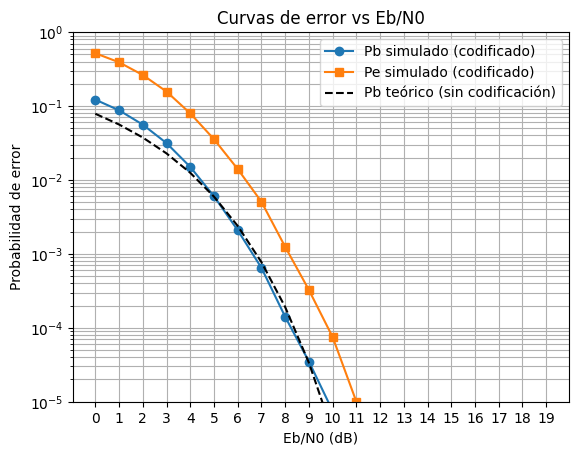

In [166]:
plt.semilogy(EbN0_dB, Pb_bit_sim, 'o-', label="Pb simulado (codificado)")
plt.semilogy(EbN0_dB, Pe_palabra_sim, 's-', label="Pe simulado (codificado)")
plt.semilogy(EbN0_dB, Pb_teorico, 'k--', label="Pb teórico (sin codificación)")
plt.xlabel("Eb/N0 (dB)")
plt.ylabel("Probabilidad de error")
plt.title("Curvas de error vs Eb/N0")
plt.grid(True, which="both")
plt.xticks(np.arange(0, 20, 1))  # Eje X de 0 a 9, paso 1
plt.ylim(1e-5, 1)  # Escala del eje Y: de 10^-5 a 1
plt.legend()
plt.show()


CONCLUSIONES DESDE EL PUNTO DE VISTA DE LA GANANCIA DE CODIGO

# Simulación (código detector)

En el ejercicio anterior, se usó el código para corregir errores. En este caso solo lo usaremos como detector
- Si el síndrome es distinto de 0, se detecta el error, pero no se corrige.
- Se cuenta la palabra como erronea
- En vez de corregir la palabra, simplemente registramos que hubo error

### Definición de parámetros iniciales

In [158]:
Pe_palabra_sim = []         #errores de palabra simulados
Pb_bit_sim = []             #errores de bit simulados
Pb_teorico = []             #curva teórica para sistema sin codificación
num_bloques = 100000        #número de bloques (palabras de código)

### Simulación

AGREGAR QUE SE HACE PASO A PASOOOOOOOOOOOOO!!!!!!!!!!

In [159]:
for EbN0 in EbN0_dB:

    # Conversión de Eb/N0 de db a veces
    EbN0_veces = 10**(EbN0/10)

    # Cálculo de energías
    Es = A**2               #Energía del símbolo
    Ebf = Es * n / k        #Energía por bit de fuente
    N0 = Ebf / EbN0_veces   #Densidad espectral del ruido (N0)

    # Inicialización de los contadores de errores y palabras válidas
    errores_palabra = 0     #errores de palabra
    errores_bit = 0         #errores de bit (solo en palabras válidas)
    total_bits = 0          #total de bits validos
    palabras_validas = 0    #número de palabras sin errores detectados

    #Simulación de transmisión y decodificación
    for _ in range(num_bloques):

        # Generación de palabra de información aleatoria (k bits)
        u = np.random.randint(0, 2, k)

        # Codificación usando la matriz generadora
        v = np.mod(u @ G, 2)

        # Modulación BPSK: 0 -> -A, 1 -> A
        s = (2*v - 1) * A

        # Ruido AWGN
        noise = np.sqrt(N0/2) * np.random.randn(n)

        # Señal recibida = señal transmitida + ruido
        r = s + noise

        # Demodulación con detección dura (umbral 0)
        vr = (r > 0).astype(int)
        
        # Calculo del síndrome (para detección de errores)
        S = np.mod(vr @ H.T, 2)
        
        # Detección de error si el síndrome es distinto de 0
        if np.any(S):
            # No hay corrección
            errores_palabra += 1
        else:
            # Palabra sin error
            palabras_validas += 1 

            #Decodificación sistemática (primeros k bits)
            u_est = vr[:k] 

            #Errores de bit (bits diferentes en palabra original y palabra decodificada)
            errores_bit += np.sum(u != u_est)
            
    
    # PROBABILIDADES DE ERROR
    Pe_palabra_sim.append(errores_palabra / num_bloques)        # Probabilidad de ereor de palabra
    if palabras_validas > 0:
        Pb_bit_sim.append(errores_bit / (palabras_validas * k)) #Probabilidad de error de bit
    else:
        Pb_bit_sim.append(1)  # Si todas las palabras dieron error, Pb=1
    
    # Pb teórico para BPSK sin codificación
    Pb_teorico.append(0.5 * erfc(np.sqrt(2*EbN0_veces)/np.sqrt(2)))


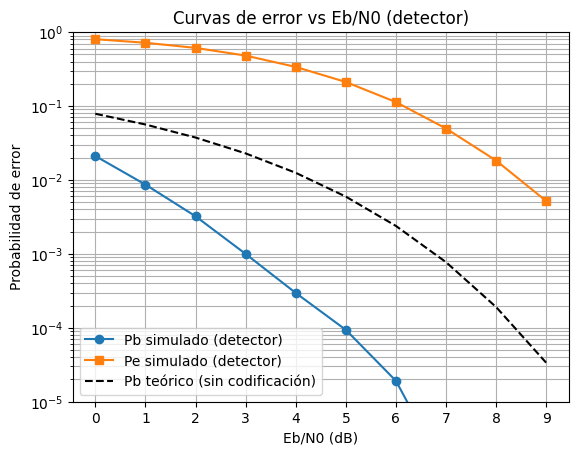

In [160]:
plt.semilogy(EbN0_dB, Pb_bit_sim, 'o-', label="Pb simulado (detector)")
plt.semilogy(EbN0_dB, Pe_palabra_sim, 's-', label="Pe simulado (detector)")
plt.semilogy(EbN0_dB, Pb_teorico, 'k--', label="Pb teórico (sin codificación)")
plt.xlabel("Eb/N0 (dB)")
plt.ylabel("Probabilidad de error")
plt.title("Curvas de error vs Eb/N0 (detector)")
plt.grid(True, which="both")
plt.xticks(np.arange(0, 10, 1)) 
plt.ylim(1e-5, 1) 
plt.legend()
plt.show()
